In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image
import cv2
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/0RIWAUS7DB3MOQFHGPCY.jpg
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss810.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/2FJCO69VUGP7KIWR045S.jpg
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss848.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/A609GDYW5J23EN71RKMP.jpg
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss145.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss825.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss30.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/maksssksksss323.png
/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/wi

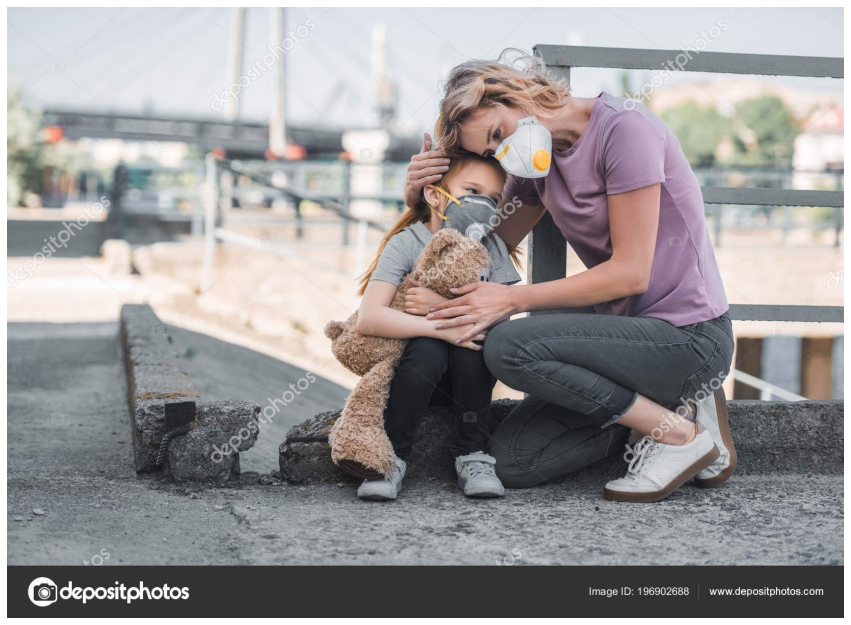

In [2]:
img = "../input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/DNU016CWPZOGFRK5YA3X.jpg"
_ = plt.figure(figsize = (15,20))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img))

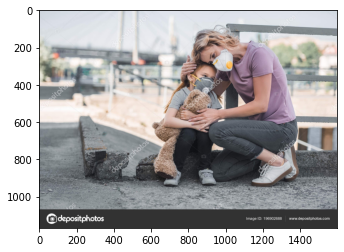

In [3]:
# Reading color image
mask = cv2.imread('/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/DNU016CWPZOGFRK5YA3X.jpg')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
print('The shape of image is ', mask.shape)

The shape of image is  (1168, 1600, 3)


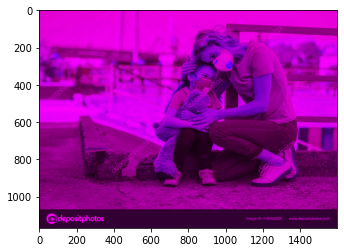

In [5]:
mask_r  = cv2.imread('/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/DNU016CWPZOGFRK5YA3X.jpg')
mask_r[:,:,1:2] = 0
plt.imshow(mask_r)
plt.show()

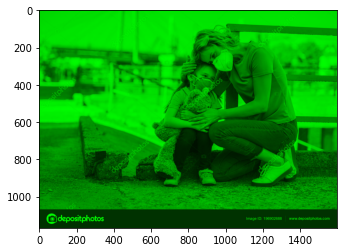

In [6]:
mask_g  = cv2.imread('/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/DNU016CWPZOGFRK5YA3X.jpg')
mask_g[:,:,(0,2)] = 0
plt.imshow(mask_g)
plt.show()

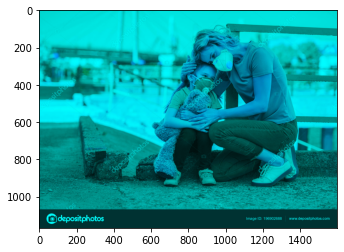

In [7]:
mask_b  = cv2.imread('/kaggle/input/medical-face-mask-detection-dataset/withMaskDataset/withMaskDataset/DNU016CWPZOGFRK5YA3X.jpg')
mask_b[:,:,0:1] = 0
plt.imshow(mask_b)
plt.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [9]:


base_path = '../input/medical-face-mask-detection-dataset/withMaskDataset/'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

629


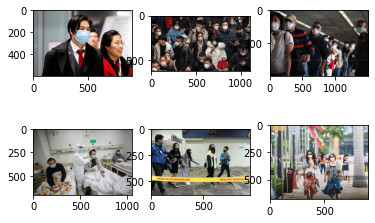

In [10]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 1274 images belonging to 1 classes.
Found 141 images belonging to 1 classes.
{0: 'withMaskDataset'}


In [12]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        9

In [13]:
model.fit_generator(train_generator, epochs=1, validation_data=validation_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


80/80 [==============================] - 155s 2s/step - loss: 1236238.8453 - acc: 0.0000e+00 - val_loss: 77372384.0000 - val_acc: 0.0000e+00


In [14]:
model.fit_generator(train_generator, epochs=1, validation_data=validation_generator)

80/80 [==============================] - 136s 2s/step - loss: 1384603776.0000 - acc: 0.0000e+00 - val_loss: 3574296832.0000 - val_acc: 0.0000e+00


In [15]:
model.fit_generator(train_generator, epochs=1, validation_data=validation_generator)

80/80 [==============================] - 136s 2s/step - loss: 3231456000.0000 - acc: 0.0879 - val_loss: 4777562112.0000 - val_acc: 0.0000e+00


In [16]:
model.fit_generator(train_generator, epochs=1, validation_data=validation_generator)

80/80 [==============================] - 137s 2s/step - loss: 23309778944.0000 - acc: 0.1766 - val_loss: 50968043520.0000 - val_acc: 0.0000e+00


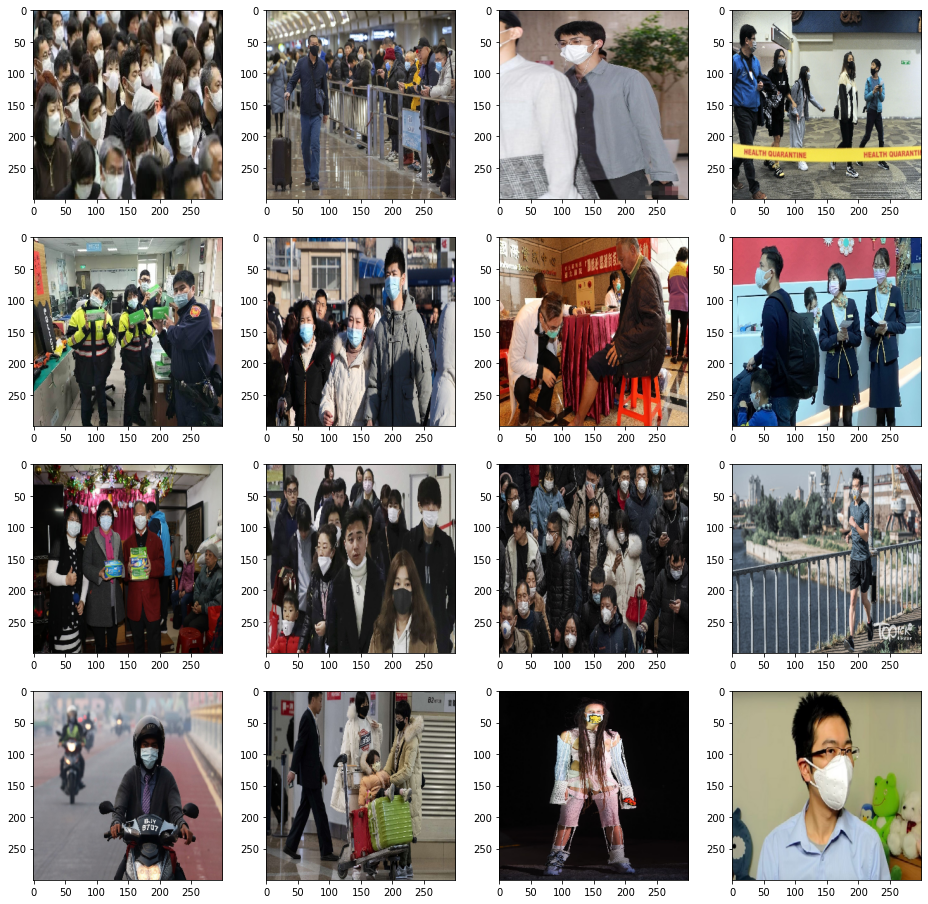

In [17]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
   # plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [18]:

from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
